## Datasets & DataLoaders

We want the dataset code to be decoupled from model training code. There are two data primitives - *torch.utils.data.DataLoader* and *torch.utils.data.Dataset* that help us use pre-loaded datasets or our own data. 

*Dataset* stores samples and corresponding labels, *DataLoader* enables access to the samples.

### Loading the Dataset
Fashion-MNIST data contains 60k training examples and 10k test examples. Each sample is a 28X28 grayscale image with a label from 10 classes.

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root = "data", # path where the data is stored
    train=True, # train or test
    download=True, # download if not available at root
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 6842295.53it/s] 


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 323519.04it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3313232.31it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5155749.04it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [4]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

### Visualize the data

Ankle Boot


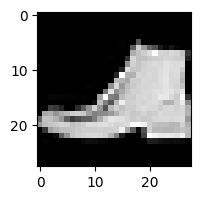

In [16]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
print(labels_map[label])

figure = plt.figure(figsize=(2,2))
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Custom Dataset

In [18]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # Initialize the directory containing the images, annotations file, transforms
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # returns the number of samples in the dataset
    def __len__(self):
        return len(self.img_labels)

    # returns a sample from the dataset at given index idx
    def __getitem__(self, idx):
        # Based on the index, it identifies the image's location on disk
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # converts it to a tensor using read_image
        image = read_image(img_path)
        # gets corresponding label from self.img_labels
        label = self.img_labels.iloc[idx, 1]
        # calls the transforms
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        # returns image and label in a tuple
        return image, label

### DataLoader
*Dataset* retrieves our dataset's features and labels one sample at a time. While training, we want to pass samples in minibatches and reshuffle the data at every epoch. Therefore, DataLoader.

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    training_data, 
    batch_size=64, 
    shuffle=True)

test_dataloader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=True
)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


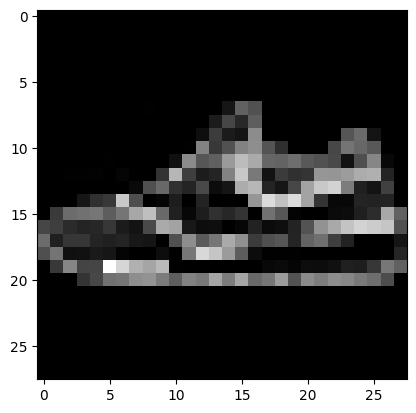

Label: Sneaker


In [22]:
# Iterate through the dataloader
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")